In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
fines = pd.read_csv('../data/fines.csv')
fines_lean = fines.drop(columns = ['Incident Address', 'Trash Hauler', 'Trash Route', 'Council District', 'State Plan X', 'State Plan Y'])
fines_lean['Zip Code'] = fines_lean['Zip Code'].astype('Int64').astype('object')

In [9]:
fines_lean = fines_lean.dropna().groupby('Zip Code').sum().reset_index()

In [10]:
fines_lean

,Zip Code,Missed Count,Fines
0,37013,2048,149600
1,37027,134,8200
2,37076,4,0
3,37086,3,200
4,37115,1053,79800
5,37138,3,0
6,37189,56,5200
7,37201,30,3200
8,37203,330,29200
9,37204,533,40000


C:\Users\user\AppData\Local\Temp\ipykernel_4204\2361767855.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


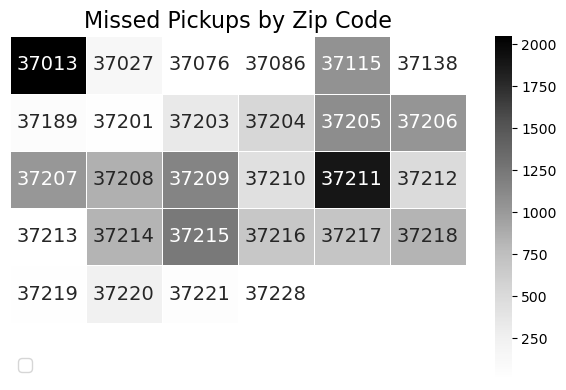

C:\Users\user\AppData\Local\Temp\ipykernel_4204\2361767855.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


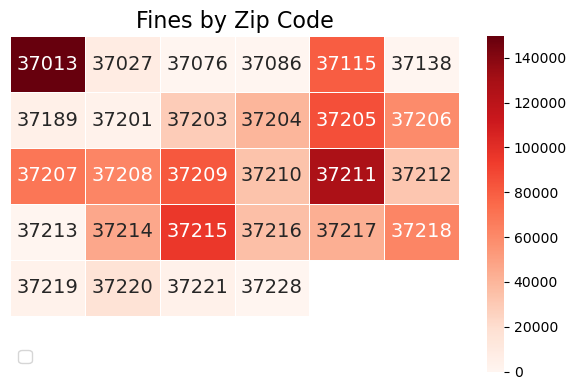

In [25]:
# --- Step 1: Arrange ZIP codes into a square-ish grid ---
n = int(np.ceil(np.sqrt(len(fines_lean))))  # grid size

# pad with NaN if needed
padded_missed = fines_lean["Missed Count"].tolist() + [np.nan] * (n**2 - len(fines_lean))
padded_fines = fines_lean["Fines"].tolist() + [np.nan] * (n**2 - len(fines_lean))
padded_zips = fines_lean["Zip Code"].tolist() + [""] * (n**2 - len(fines_lean))

missed_matrix = np.array(padded_missed).reshape(n, n)
fines_matrix = np.array(padded_fines).reshape(n, n)
zip_matrix = np.array(padded_zips).reshape(n, n)

# --- Step 2: Missed Count Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(
    missed_matrix,
    cmap="Greys",
    annot=zip_matrix,  # annotate with zip codes
    annot_kws={'size': 14},
    fmt="",
    cbar=True,
    linewidths=.5
)
plt.title("Missed Pickups by Zip Code", fontsize=16)
plt.legend(fontsize=12)
plt.axis('off'),
plt.xticks([], [])
plt.yticks([], [])
plt.tight_layout()
plt.savefig('../visualizations/missed_by_zip.png')
plt.show()

# --- Step 3: Fines Heatmap ---
plt.figure(figsize=(6, 4))
sns.heatmap(
    fines_matrix,
    cmap="Reds",
    annot=zip_matrix,
    annot_kws={'size': 14},
    fmt="",
    cbar=True,
    linewidths=.5
)
plt.title("Fines by Zip Code", fontsize=16)
plt.legend(fontsize=12)
plt.axis('off')
plt.xticks([], [])
plt.yticks([], [])
plt.tight_layout()
plt.savefig('../visualizations/fines_by_zip.png')
plt.show()

In [44]:
fines_lean = fines_lean.sort_values('Fines', ascending=False).reset_index(drop = True)

In [28]:
worst_5 = fines_lean.head(5)

In [29]:
best_5 = fines_lean.tail(5)
best_5

,Zip Code,Missed Count,Fines
23,37086,3,200
24,37138,3,0
25,37076,4,0
26,37213,1,0
27,37228,1,0


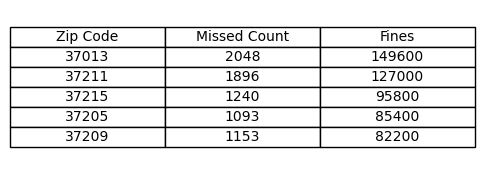

In [30]:
    # Create a figure and an axes object
    fig, ax = plt.subplots(figsize=(5, 2)) # Adjust figsize as needed

    # Hide the axes
    ax.axis('off')
    ax.axis('tight')

    # Create the table
    table = ax.table(cellText=worst_5.values,
                     colLabels=worst_5.columns,
                     cellLoc='center',
                     loc='center')

    # Adjust table properties for better appearance (optional)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2) # Scale the table size

    # Save the figure as a PNG
    plt.savefig('../visualizations/worst_5.png')


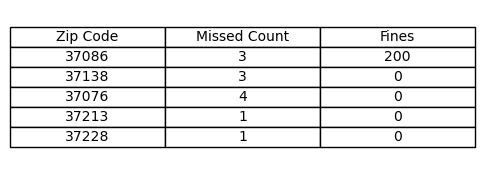

In [31]:
    # Create a figure and an axes object
    fig, ax = plt.subplots(figsize=(5, 2)) # Adjust figsize as needed

    # Hide the axes
    ax.axis('off')
    ax.axis('tight')

    # Create the table
    table = ax.table(cellText=best_5.values,
                     colLabels=best_5.columns,
                     cellLoc='center',
                     loc='center')

    # Adjust table properties for better appearance (optional)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2) # Scale the table size

    # Save the figure as a PNG
    plt.savefig('../visualizations/best_5.png')


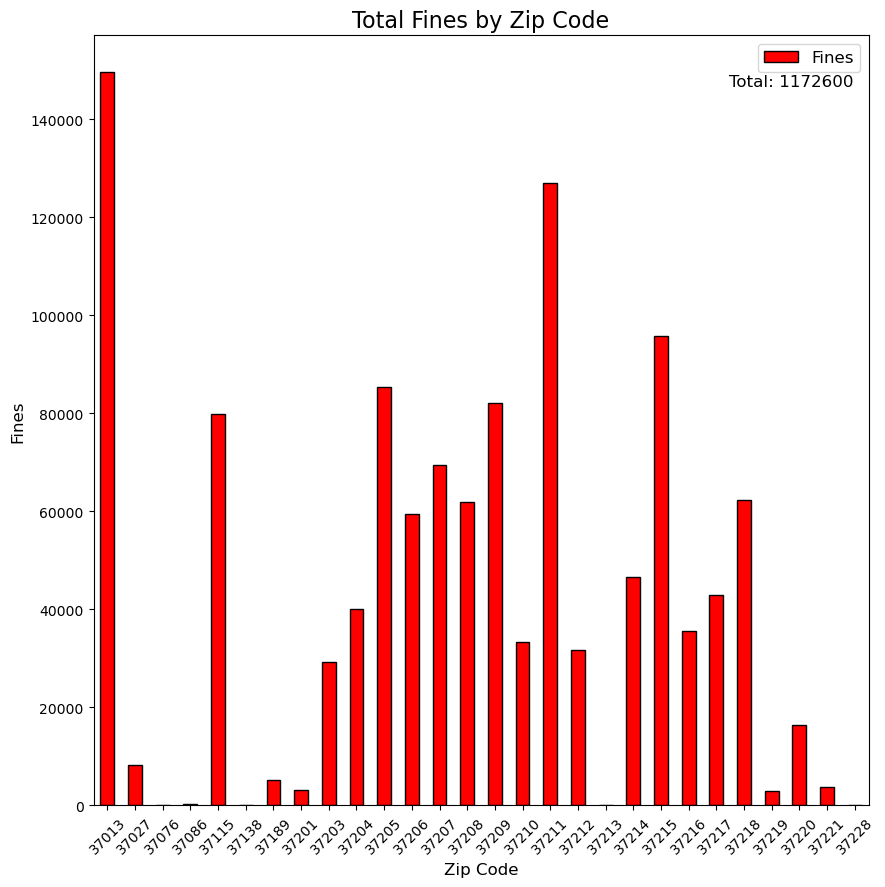

In [42]:
fines_lean.plot(
    figsize=(10, 10),
    x='Zip Code',
    y='Fines',
    kind='bar',
    color='red', 
    edgecolor='black')

total_fines = fines_lean["Fines"].sum()

plt.text(
    0.98, 0.95, f"Total: {total_fines}", 
    transform=plt.gca().transAxes,  # relative to axes
    ha="right", va="top",
    fontsize=12
)

plt.title('Total Fines by Zip Code', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.xlabel('Zip Code', fontsize=12)
plt.ylabel('Fines', fontsize=12)
plt.savefig('../visualizations/fines_bar.png')

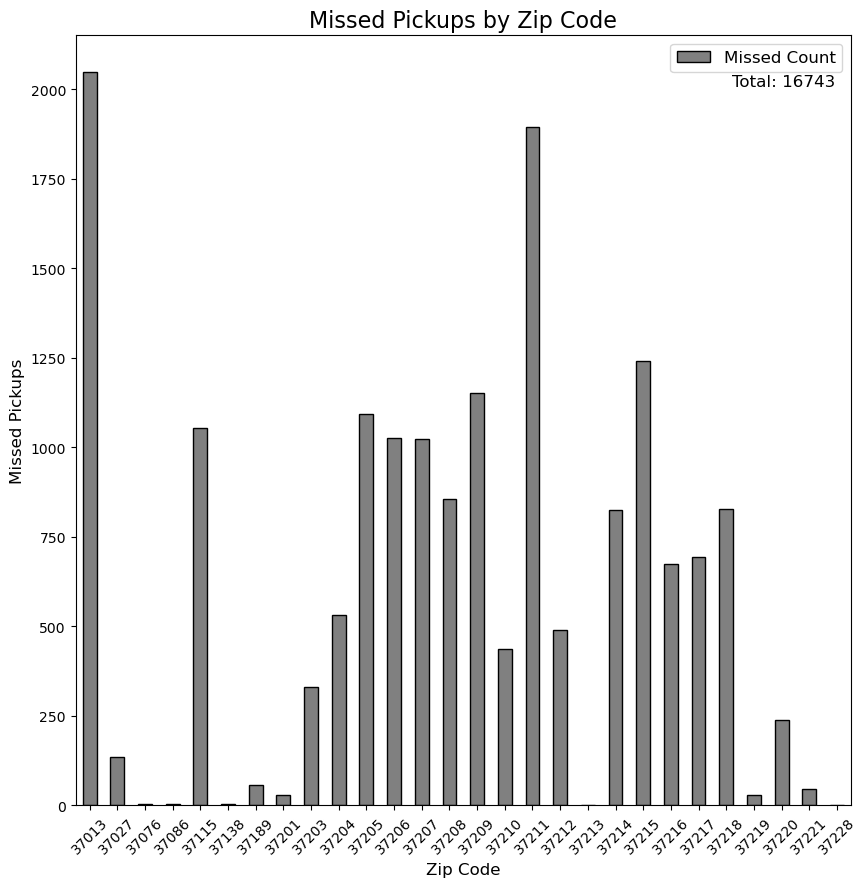

In [43]:
fines_lean.plot(
    figsize=(10, 10),
    x='Zip Code',
    y='Missed Count',
    kind='bar',
    title='Missed Pickups by Zip Code',
    color='gray', 
    edgecolor='black')

total_missed = fines_lean["Missed Count"].sum()

plt.text(
    0.98, 0.95, f"Total: {total_missed}", 
    transform=plt.gca().transAxes,  # relative to axes
    ha="right", va="top",
    fontsize=12
)

plt.title('Missed Pickups by Zip Code', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.xlabel('Zip Code', fontsize=12)
plt.ylabel('Missed Pickups', fontsize=12)
plt.savefig('../visualizations/missed_trash_bar.png')